In [1]:
import sqlite3
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

from datetime import datetime

connect_registros = sqlite3.connect('../registro.db')

In [84]:
# Lendo tabela medidas do banco de dados 'registro.db'
cursor = connect_registros.cursor()
# YYYY-MM-DD HH:MM:SS.SSS
cursor.execute("""SELECT * FROM medidas WHERE data_registro BETWEEN '2020-05-28 14:00' AND '2020-05-31 08:00';""")
register = pd.DataFrame(cursor.fetchall(), columns =['id', 'nome', 'pressao', 'temperatura', 'UR', 'pwm_valvula_pressao', 'pwm_valvula_vacuo','status_bomba','status_pid','setpoint','estado', 'data_registro'])
register.loc[:, 'data_registro'] = pd.to_datetime(register.data_registro, format="%Y-%m-%d %H:%M:%S")

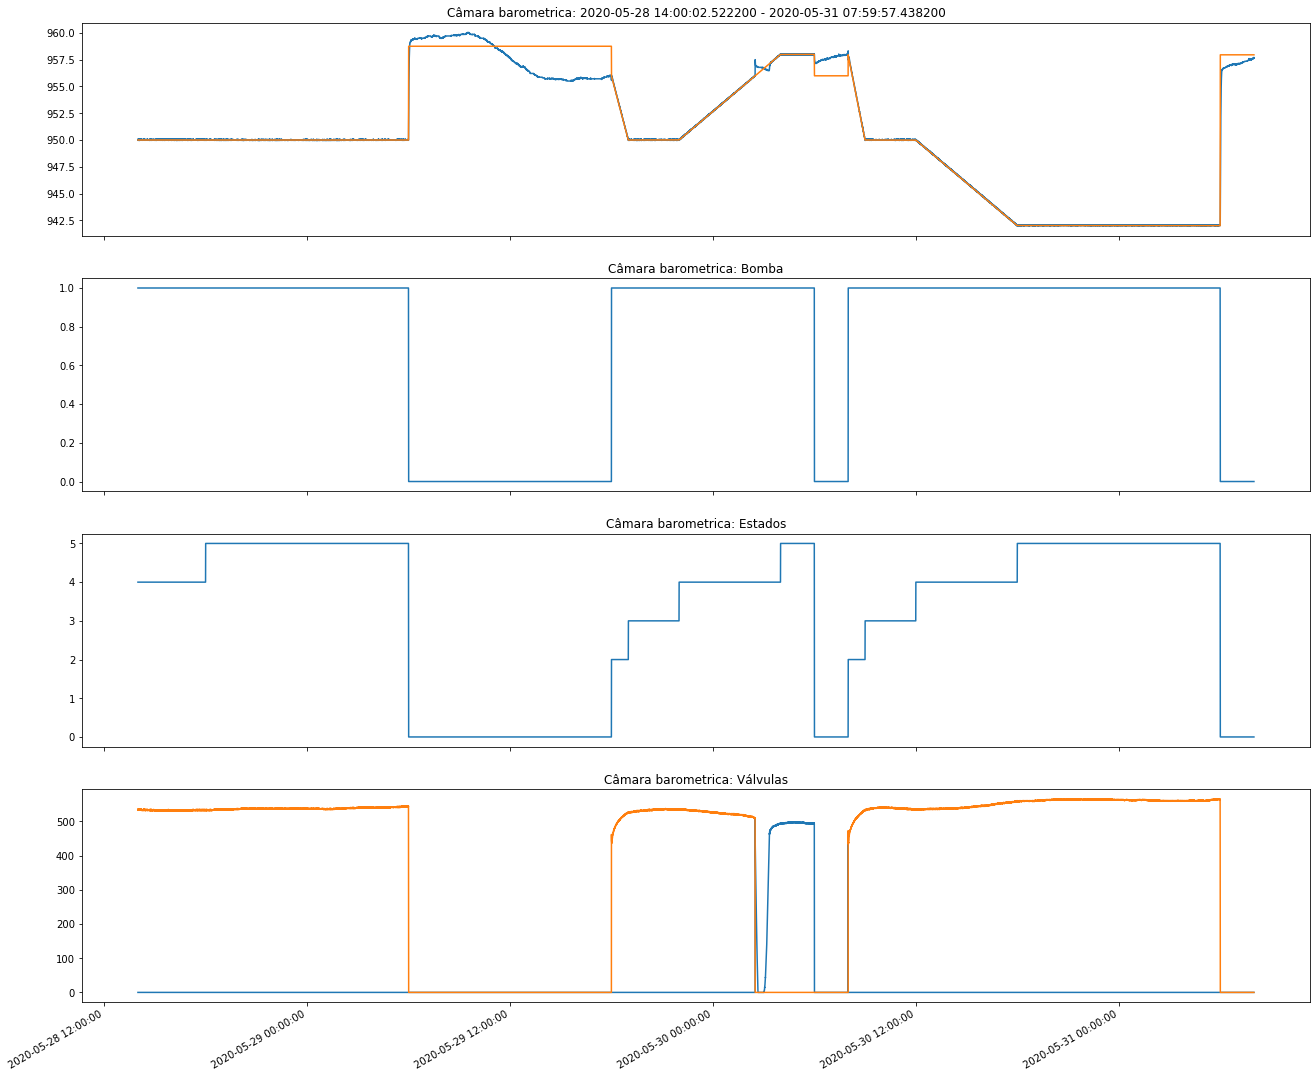

In [85]:
fig, ((ax1),(ax2),(ax3),(ax4)) = plt.subplots(ncols=1, nrows=4, figsize=(22, 20))

filter  = ~register.data_registro.isnull()

ax1.plot(register.data_registro[filter], register.pressao[filter].astype(float))
ax1.plot(register.data_registro[filter], register.setpoint[filter].astype(float))
ax1.set_title("Câmara barometrica: " + str(register.data_registro.min()) + " - " + str(register.data_registro.max()))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
fig.autofmt_xdate()

ax2.set_title("Câmara barometrica: Bomba")
ax2.plot(register.data_registro[filter], register.status_bomba[filter].astype(float))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

ax3.set_title("Câmara barometrica: Estados")
ax3.plot(register.data_registro[filter], register.estado[filter].astype(float))
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax3.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

ax4.set_title("Câmara barometrica: Válvulas")
ax4.plot(register.data_registro[filter], register.pwm_valvula_pressao[filter].astype(float))
ax4.plot(register.data_registro[filter], register.pwm_valvula_vacuo[filter].astype(float))
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax4.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))

In [86]:
register.nome.value_counts()

D. luteipes_Alta_R2(2020-05-29 07-32-39.839668)          25490
D.luteipes_ninfa_Baixa_R2(2020-05-30 07-32-17.241305)    25087
D.luteipes_ninfa_EST_R2(2020-05-28 07-57-57.737135)      18486
parado                                                    5651
D.luteipes_ninfa_EST_R3(2020-05-31 07-47-53.463114)        231
Name: nome, dtype: int64